**Вариант 22**

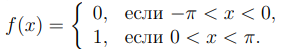

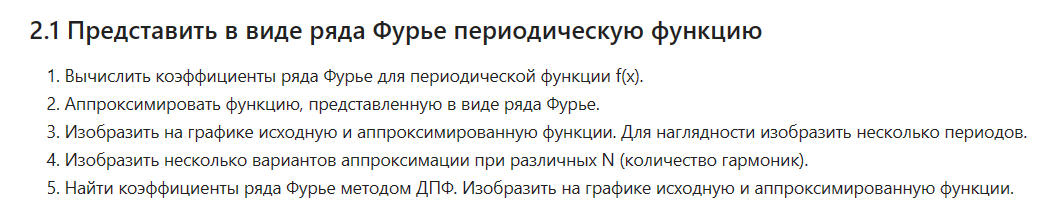

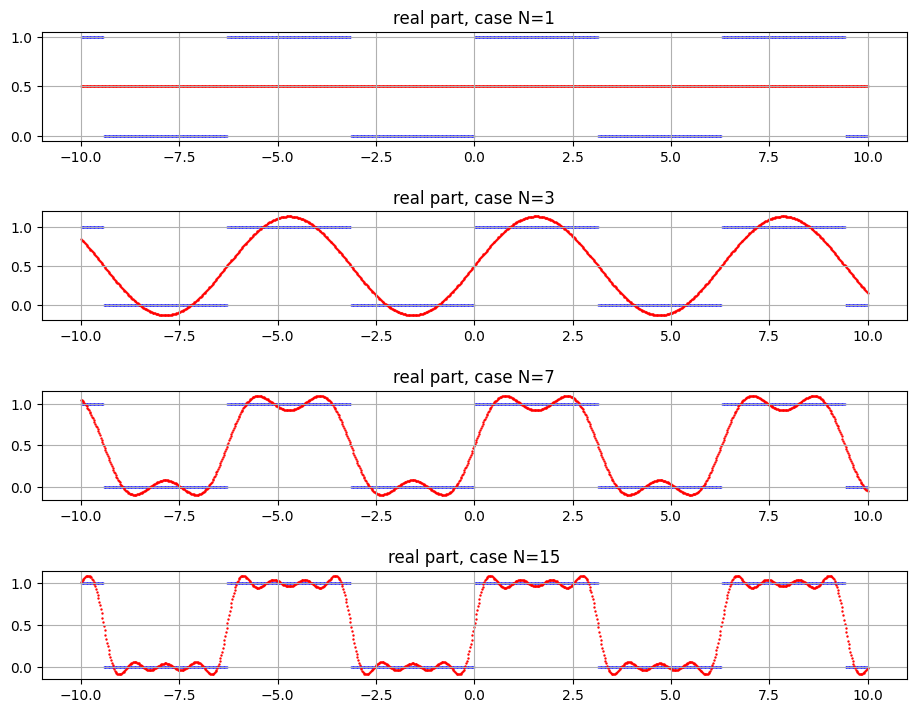

[ 4.73147339e-19+1.06103295e-01j  5.55111512e-17+2.72488238e-17j
 -4.21973863e-18+3.18309886e-01j  5.00000000e-01+0.00000000e+00j
 -4.21973863e-18-3.18309886e-01j  5.55111512e-17-2.72488238e-17j
  4.73147339e-19-1.06103295e-01j]


In [11]:
#1-4
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# # Вычислить коэфиценты ряда Фурье для периодеческой функции f(x) = 0, если (-π < x < 0)
# #                                                           f(x) = 1, если (0 < x < π)
# Аппроксимировать функцию, представленную в виде ряда Фурье.
# Изобразить на графике исходную и аппроксимированную функции. Для наглядности изобразить несколько периодов.
# Изобразить несколько вариантов аппроксимации при различных N (количество гармоник)
f = lambda x: (1 if (-np.pi < ((x % T) - T/2.) and ((x % T) - T/2.) < 0) else 0)


# Исходные данные
T = 2*np.pi           # Период
x1 = -10.             # Нижняя граница области определения функции
x2 = 10.              # Верхняя граница области определения функции
Nx = 1000             # Дискретизация по оси X

# Ось X
x_range = np.linspace(x1, x2, Nx)

# Эталонные кривые исходной функции f(x)
y_true = []
for i in range (len(x_range)):
 y_true.append(f(x_range[i]))

y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

# Расчет интеграла от комплексной функции
def integral_complex(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral


# Вычисление коэффициентов ряда Фурье c[-N/2],.., c[0], .., c[N/2-1] (всего N)
def fourier_coeffs(func, N):
    result = []
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        ck = (1./T) * integral_complex(lambda x: func(x) * np.exp(-1j * 2 * np.pi * k * x / T), 0, T)[0]
        result.append(ck)
    return np.array(result)

# Аппроксимация (восстановление) функции f(x) при помощи коэффициентов c[k]
def fourier_fit(x, c):
    result = 0. + 0.j
    N = len(c)
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        result += c[k+int(N/2)] * np.exp(1j * 2. * np.pi * k * x / T)
    return result

# Вычисление коэффициентов, аппроксимация, построение графиков при разных N
N_all = [1, 3, 7, 15]

fig, axs = plt.subplots(len(N_all), 1, figsize=(10, 8))

fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
row = 0
for N in N_all:
    C = fourier_coeffs(f, N)
    y_approx = fourier_fit(x_range, C)
    y_approx_real = [y.real for y in y_approx]
    # y_approx_imag = [y.imag for y in y_approx]
    axs[row].set_title('real part, case N=' + str(N))                           #[,0]
    # axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row].grid(True)
    # axs[row, 1].grid(True)
    axs[row].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
    axs[row].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
    # axs[row, 1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
    # axs[row, 1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
    row += 1
plt.show()


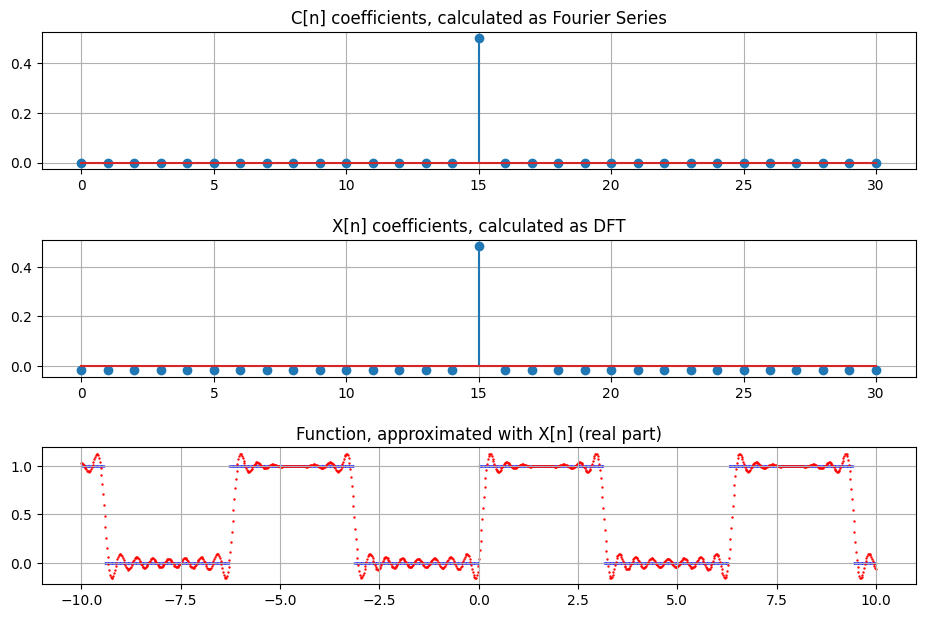

In [12]:
#1.5
from scipy import fftpack
# Найти коэффициенты ряда Фурье методом ДПФ. Изобразить на графике исходную и аппроксимированную функции.

# Количество коэффициентов
N_dft = 31

# Расчет коэффициентов ряда Фурье
cn = fourier_coeffs(f, N_dft)

# Определение функции f(x) на одном периоде (от 0 до T)
x_period = np.arange(0, T, T/N_dft)

f = lambda x: np.vectorize(lambda x_val: (1 if (-np.pi < ((x_val % T) - T/2.) and ((x_val % T) - T/2.) < 0) else 0))(x)

fx = f(x_period)

# Расчет коэффициентов методом ДПФ
X = fftpack.fft(fx) / N_dft
X = np.roll(X, int(N_dft/2))
# Аппроксимация функции f(x) новым набором коэффициентов
y_approx = fourier_fit(x_range, X)
y_approx_real = [y.real for y in y_approx]
y_approx_imag = [y.imag for y in y_approx]
# Отображение результатов
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 7))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
axes[0].stem(np.real(cn))
axes[0].grid(True)
axes[0].set_title('C[n] coefficients, calculated as Fourier Series')
axes[1].stem(np.real(X))
axes[1].grid(True)
axes[1].set_title('X[n] coefficients, calculated as DFT')
axes[2].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
axes[2].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
axes[2].set_title('Function, approximated with X[n] (real part)')
# axes[1,1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
# axes[1,1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
# axes[1,1].set_title('Function, approximated with X[n] (imag part)')
axes[2].grid(True)
# axes[1,1].grid(True)

plt.show()

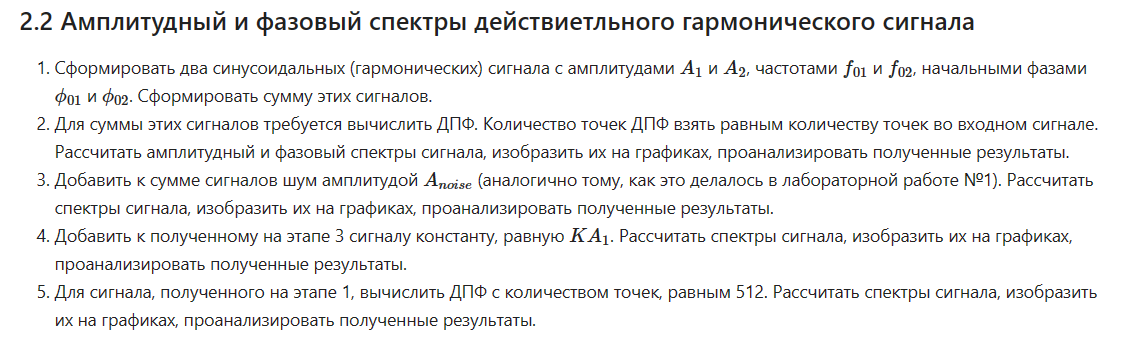

In [135]:
# # 1. Сформировать два синусоидальных (гармонических) сигнала с амплитудами A_1 и A_2, частотами f_01 и f_02,
# # начальными фазами y_01 и y_02. Сформировать сумму этих сигналов.
# # 2. Для суммы этих сигналов требуется вычислить ДПФ. Количество точек ДПФ взять равным количеству точек во входном сигнале.
# # Рассчитать амплитудный и фазовый спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.

# from matplotlib import pyplot as plt
# from scipy import fftpack
# import numpy as np

# Amp1 = 2                # Ампилитуда сигнала 1
# Amp2 = 3                # Ампилитуда сигнала 2

# f01 = 22                 # Частота сигнала 1
# f02 = 17                 # Частота сигнала 2

# phi01 = 3 * np.pi / 4    # Фаза сигнала 1
# phi02 = 2 * np.pi / 22   # Фаза сигнала 2

# Anoise = 4              # Амплитуда шума

# K = 1.75                 # Коэффициент усиления

# fs = 64                 # Частота дискретизации в Гц
# T = 1 / fs              # Период дискретизации в секундах
# N = 100                  # Размер ДПФ (количество гармоник)

# # Оси времени и частоты
# t = np.linspace(0, N * T, N, endpoint = False)
# f = fftpack.fftfreq(N) * fs                               #The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

# # Генерация сигнала 1 и 2 (Re + Im)
# x1_re = Amp1 * np.cos(2 * np.pi * f01 * t * phi01)
# x1_im = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))

# x2_re = Amp2 * np.cos(2 * np.pi * f02 * t * phi02)
# x2_im = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))

# # Сумма сигналов
# x_re = x1_re + x2_re
# x_im = x1_im + x2_im
# # Дискретное преобразование Фурье
# X_re = fftpack.fft(x_re) / N
# X_im = fftpack.fft(x_im) / N

# # Амплитудный и фазовый частотный спектры
# a_im = np.abs(x_im)
# A_re = np.abs(X_re)
# A_im = np.abs(X_im)

# P_re = np.arctan(np.imag(X_re) / (np.real(X_re)+1e-6))
# P_im = np.arctan(np.imag(X_im) / (np.real(X_im)+1e-6))
# p_im = np.arctan(np.imag(x_im) / (np.real(x_im)+1e-6))

# def plot_signal(x_re, A_re, P_re, x_im, A_im, P_im, Title='Signal'):
#   fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 6))

#   x = x_im
#   A = A_im
#   P = P_im
#   Title = 'Complex signal'
#   axes[0].plot(t, np.real(x), label='real', color='red')
#   axes[0].plot(t, np.imag(x), label='imag', color='blue')
#   axes[0].grid(True)
#   axes[0].set_xlabel('Time [s]')
#   axes[0].set_ylabel('Signal Amplitude')
#   axes[0].legend()
#   axes[0].title.set_text(Title)
#   axes[1].stem(f, A)
#   axes[1].grid(True)
#   axes[1].set_xlabel('Frequency [Hz]')
#   axes[1].set_ylabel('Spectrum Magnitude')
#   axes[1].set_xlim(-fs/2, fs/2)
#   axes[1].title.set_text('Amplitude spectrum')
#   axes[2].stem(f, P / np.pi)
#   axes[2].grid(True)
#   axes[2].set_xlabel('Frequency [Hz]')
#   axes[2].set_ylabel('Phase / pi')
#   axes[2].set_xlim(-fs/2, fs/2)
#   axes[2].title.set_text('Phase spectrum')
#   fig.tight_layout()
#   plt.show()

# # Отображение группами (subplot)
# plot_signal(X_re, A_re, P_re, x_im, a_im, p_im)
# plot_signal(X_re, A_re, P_re, X_im, A_im, P_im)


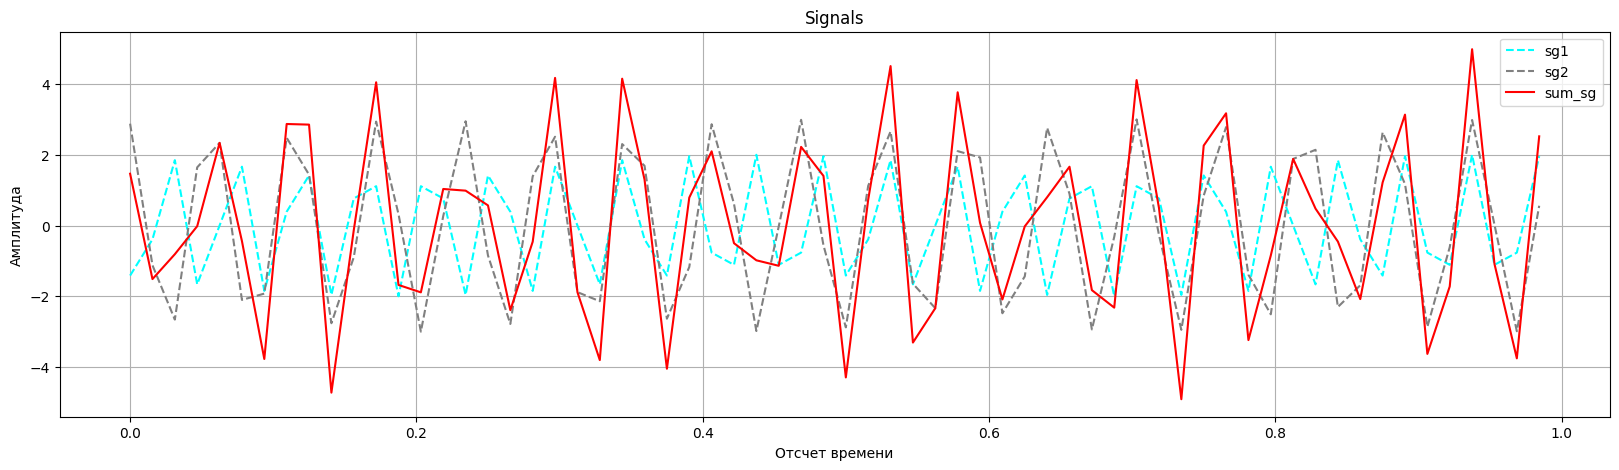

In [146]:
# 1. Сформировать два синусоидальных (гармонических) сигнала с амплитудами A_1 и A_2, частотами f_01 и f_02,
# начальными фазами y_01 и y_02. Сформировать сумму этих сигналов.
# 2. Для суммы этих сигналов требуется вычислить ДПФ. Количество точек ДПФ взять равным количеству точек во входном сигнале.
# Рассчитать амплитудный и фазовый спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.

Amp1 = 2                # Ампилитуда сигнала 1
Amp2 = 3                # Ампилитуда сигнала 2
f01 = 22                 # Частота сигнала 1
f02 = 17                 # Частота сигнала 2
phi01 = 3 * np.pi / 4    # Фаза сигнала 1
phi02 = 2 * np.pi / 22   # Фаза сигнала 2
Anoise = 4              # Амплитуда шума
K = 1.75                 # Коэффициент усиления
fs = 64                # Частота дискретизации в Гц
T = 1 / fs              # Период дискретизации в секундах
N = 64                  # Размер ДПФ (количество гармоник)

t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

x1 = Amp1*np.cos(2 * np.pi * f01 * t + phi01)

x2 = Amp2*np.cos(2 * np.pi * f02 * t + phi02)

x3 = x1+x2

plt.figure(figsize=(20,5))
plt.title("Signals")
plt.plot(t, x1,  color='cyan', label="sg1", linestyle='dashed')
plt.plot(t, x2,  color='grey',  label="sg2", linestyle='dashed')
plt.plot(t, x3,  color='red',  label="sum_sg")
plt.ylabel("Амплитуда")
plt.xlabel("Отсчет времени")
plt.grid()
plt.legend()
plt.show()


Если увеличить частоту дискретизации, к примеру, в 10 раз (64 -> 640), то сигналы х1, х2, х3 будут намного глаже и приятнее для работы

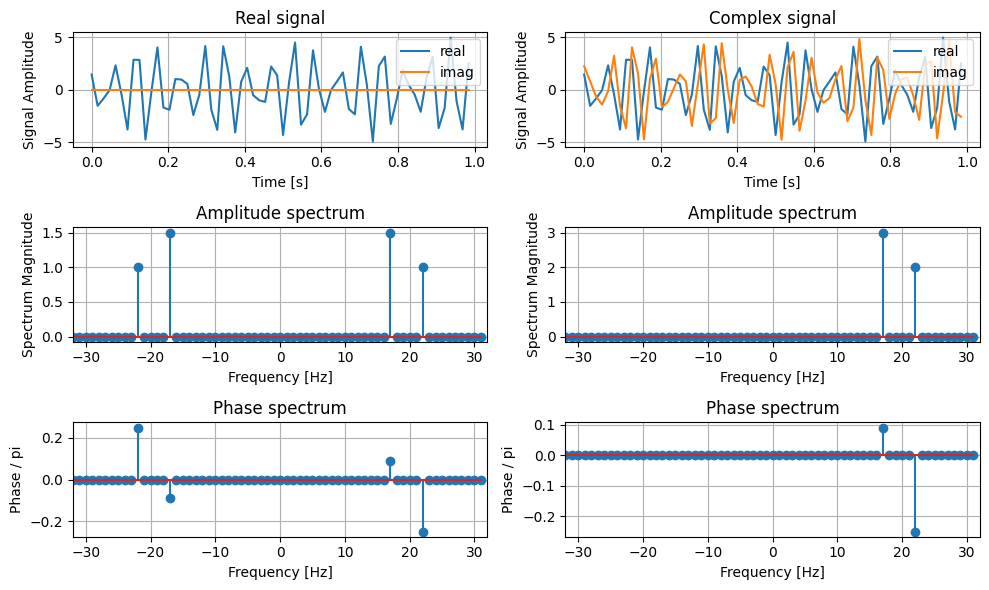

In [147]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np

# Оси времени и частоты
t = np.linspace(0, N*T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs


sg1_re = Amp1*np.cos(2 * np.pi * f01 * t + phi01)
sg2_re = Amp2*np.cos(2 * np.pi * f02 * t + phi02)
sg1_im = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
sg2_im = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))


# Генерация действительного и комплексного гармонического сигнала
x1 = sg1_re + sg2_re
x2 = sg1_im + sg2_im

# Дискретное преобразование Фурье
X1 = fftpack.fft(x1) / N
X2 = fftpack.fft(x2) / N

# Амплитудный и фазовый частотный спектры
A1 = np.abs(X1);
A2 = np.abs(X2);
P1 = np.arctan(np.imag(X1) / (np.real(X1)+1e-6));
P2 = np.arctan(np.imag(X2) / (np.real(X2)+1e-6));
# ПРИМЕЧАНИЕ. Для того, чтобы избавиться от неопределенности типа 0/0 при вычислении фазового спектра,
# прибавим к знаменателю достаточно малое число, чтобы частное было близко к нулю, и корректно отображалось на графике.
# В противном случае, в точках с нулевыми гармониками мы будем видеть случайные значения, полученные в результате
# деления малых чисел, близких к 0, с ограниченной точностью, что не очень адекватно отразит изучаемые свойства спектров.

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = x1
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = x2
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

In [148]:
#2.3 Добавить к сумме сигналов шум амплитудой. Рассчитать спектры сигнала, изобразитьих на графиках, проанализировать полученные результаты.
import random
random.seed(323)

# Генерация шума амплитуды Anoise
noise = np.linspace(0, N * T, N, endpoint = False)
for i in range(0, len(noise)):
  noise[i]= random.randint(-Anoise, Anoise)

# Добавление шума к сумме сигналов 1 и 2
noised_x_re = np.add(x1, noise)
noised_x_im = np.add(x2, noise)
# print(noised_x_re)
# print(noised_x_im)

noised_X_re = fftpack.fft(noised_x_re) / N
noised_X_im = fftpack.fft(noised_x_im) / N

# Амплитудный и фазовый частотный спектры
noised_A_re = np.abs(noised_X_re)
noised_A_im = np.abs(noised_X_im)

noised_P_re = np.arctan(np.imag(noised_X_re) / (np.real(noised_X_re)+1e-6))
noised_P_im = np.arctan(np.imag(noised_X_im) / (np.real(noised_X_im)+1e-6))

# # Отображение группами (subplot)                                                          # туфта какая-то
# plot_signal(noised_X_re, noised_A_re, noised_P_re, noised_X_im, noised_A_im, noised_P_im)

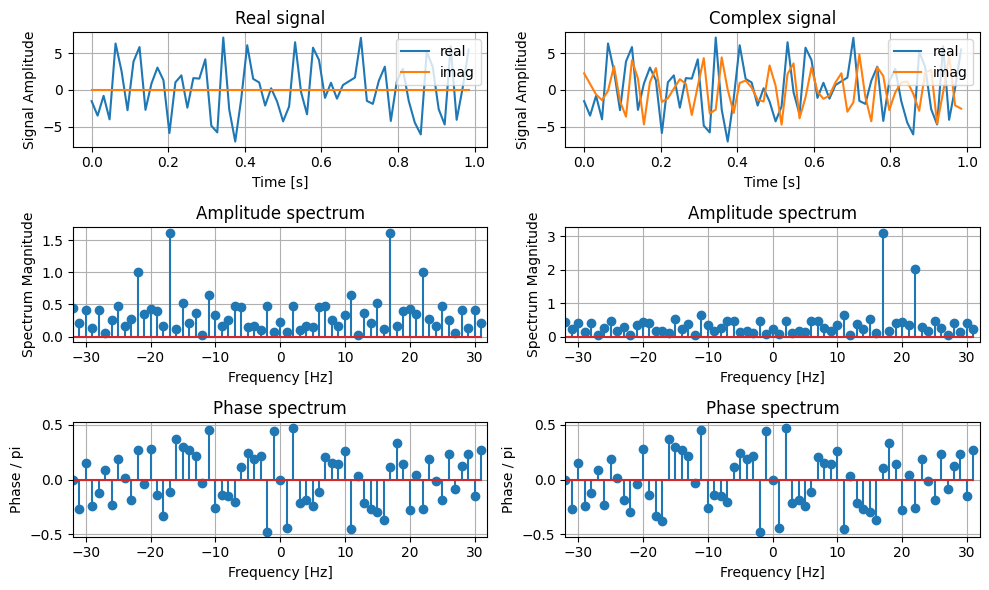

In [149]:
# построение 2.2.3
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = noised_x_re
        A = noised_A_re
        P = noised_P_re
        Title = 'Real signal'
    else:
        x = noised_x_im
        A = noised_A_im
        P = noised_P_im
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

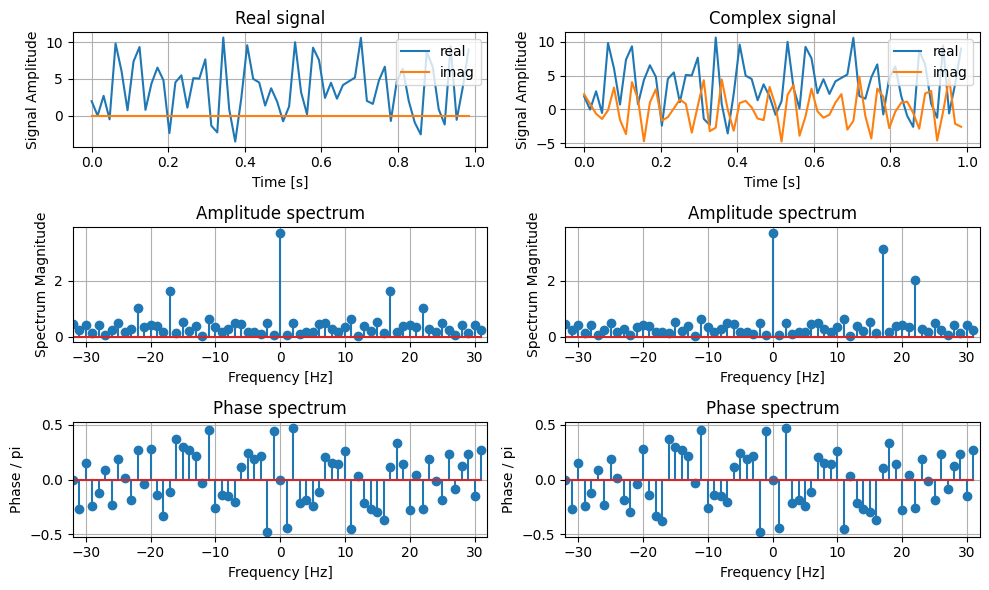

In [151]:
#2.4 обавить к полученному на этапе 3 сигналу константу, равную KA1. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.


constant = (K * Amp1)

# Добавление шума к сумме сигналов 1 и 2
noised_x_re_k = np.add(noised_x_re, constant)
noised_x_im_k = np.add(noised_x_im, constant)

noised_X_re_k = fftpack.fft(noised_x_re_k) / N
noised_X_im_k = fftpack.fft(noised_x_im_k) / N

# Амплитудный и фазовый частотный спектры
noised_A_re_k = np.abs(noised_X_re_k)
noised_A_im_k = np.abs(noised_X_im_k)

noised_P_re_k = np.arctan(np.imag(noised_X_re_k) / (np.real(noised_X_re_k)+1e-6))
noised_P_im_k = np.arctan(np.imag(noised_X_im_k) / (np.real(noised_X_im_k)+1e-6))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = noised_x_re_k
        A = noised_A_re_k
        P = noised_P_re_k
        Title = 'Real signal'
    else:
        x = noised_x_im_k
        A = noised_A_im_k
        P = noised_P_im_k
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

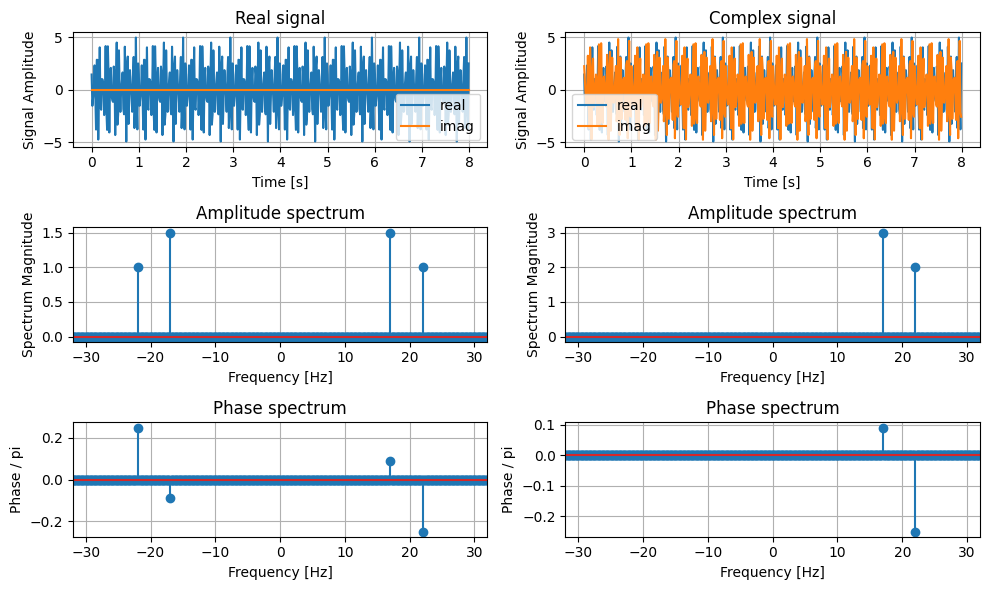

In [152]:
#2.2.5

N = 512                  # Размер ДПФ (количество гармоник)

# Оси времени и частоты
t = np.linspace(0, N*T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs


sg1_re = Amp1*np.cos(2 * np.pi * f01 * t + phi01)
sg2_re = Amp2*np.cos(2 * np.pi * f02 * t + phi02)
sg1_im = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
sg2_im = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))


# Генерация действительного и комплексного гармонического сигнала
x1 = sg1_re + sg2_re
x2 = sg1_im + sg2_im

# Дискретное преобразование Фурье
X1 = fftpack.fft(x1) / N
X2 = fftpack.fft(x2) / N

# Амплитудный и фазовый частотный спектры
A1 = np.abs(X1);
A2 = np.abs(X2);
P1 = np.arctan(np.imag(X1) / (np.real(X1)+1e-6));
P2 = np.arctan(np.imag(X2) / (np.real(X2)+1e-6));

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = x1
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = x2
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

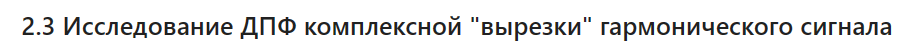

Ni = 23
f0 = 3
phi0 = 1.2566370614359172
N = 128
T = 0.018518518518518517
s = 0
Anoise = 4
K = 1.75
int((Ni - 1) / 2) = 11


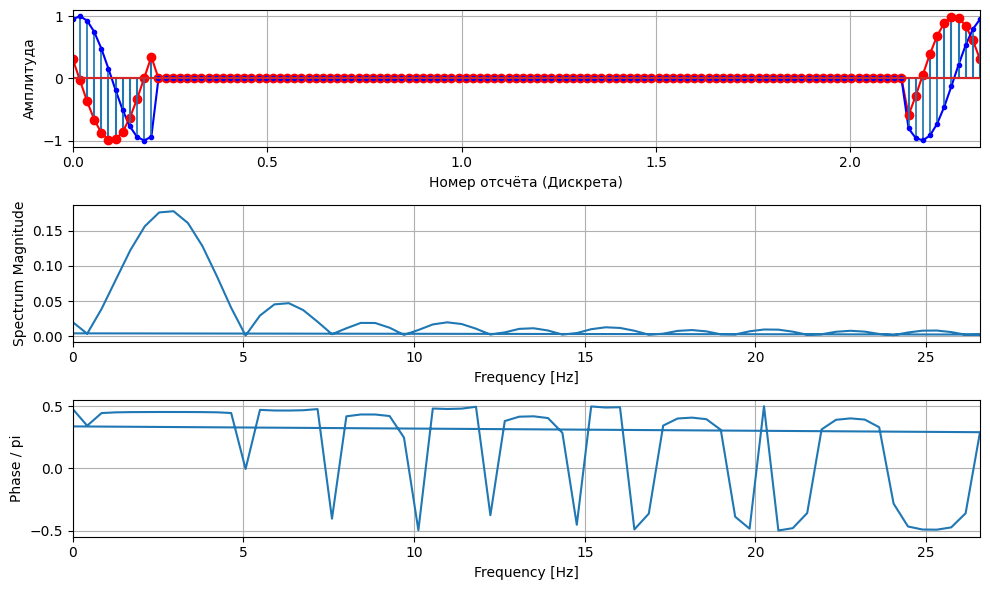

In [211]:
# Исследование ДПФ комплексной "вырезки" гармонического сигнала

import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from scipy.signal import argrelextrema

Ni = 23                            #длина исходного сигнала в отсчетах

f0 = 3                             # Частота гармонического сигнала 1
phi0 = 2 * np.pi / 5               # Начальная фаза гармонического сигнала 1
N2 = 128                   # Размер ДПФ (количество гармоник)
T = 1/ (3 * f0 * 6 * 1)                # Период дискретизации, сек (1/54)
fs = 1 / T
# fs = 64                         # Частота дискретизации, Гц
# sign = (-1) * (22 % 2)
s = 0
Anoise = 4                        # Амплитуда шума
K = 1.75                          # Коэффициент усиления

print('Ni =', Ni)
print('f0 =', f0)
print('phi0 =', phi0)
print('N =', N2)
print('T =', T)
print('s =', s)
print('Anoise =', Anoise)
print('K =', K)
# 3.1 На основании исходных данных Ni (длина исходного сигнала в отсчетах,
# нечетное число) и N (общее количество отсчетов сигнала) сформировать
# комплексную гармоническую "вырезку" таким образом, чтобы в
# положительной и отрицательной области было равное количество отсчетов
# сигнала. Не случайно Ni предлагается взять нечетным числом:

# t = np.linspace(0, N2 * T, N2, endpoint = False)
t = np.linspace(0, (N2-1)*T, N2, endpoint = False)

# complex harmonic discrete  signal
print('int((Ni - 1) / 2) =', int((Ni - 1) / 2))   #количество отсчетов на + и -области

sg = np.exp(1j * (2 * np.pi * f0 * t + phi0))
Ni_h = int((Ni - 1) / 2) # halfs
#дополнение нулями
x_cut = np.concatenate((sg[0 : Ni_h + 1 + s], np.zeros(N2 - Ni), sg[N2 - Ni_h + s : N2]))

# print('len x_cut =', len(x_cut))
f_cut = fftpack.fftfreq(N2) * fs
X_cut = fftpack.fft(x_cut) / N2

A_cut = np.abs(X_cut)
P_cut = np.arctan(np.imag(X_cut) / (np.real(X_cut) + 1e-6))

# print(len(X_cut))
# print(len(A_cut))
# print(len(P_cut))

# plot_signal(X_cut, A_cut, P_cut, X_cut, A_cut, P_cut)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
Title = 'Гармоническая вырезка'

axes[0].plot(t, np.real(x_cut), label='real', color='red')
axes[0].plot(t, np.imag(x_cut), label='imag', color='blue')
markerline, stemline, baseline, = axes[0].stem(t, np.real(x_cut), label='real', markerfmt='ro')
markerline, stemline, baseline, = axes[0].stem(t, np.imag(x_cut), label='imag', markerfmt='bo')
plt.setp(stemline, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
axes[0].grid(True)
axes[0].set_xlabel('Номер отсчёта (Дискрета)')
axes[0].set_ylabel('Амплитуда')
axes[0].set_xlim(np.min(t), np.max(t))
axes[1].grid(True)
axes[1].plot(f_cut, A_cut)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(0, np.max(f_cut))
axes[2].grid(True)
axes[2].plot(f_cut, P_cut / np.pi)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(0, np.max(f_cut))


fig.tight_layout()
plt.show()

# print(f'Ni == A: {Ni} == {np.round(np.max(A_cut))}')
# print(f'max A position (f\'0): {f0 * T * N2}')
# print(f'Pos of A nulls: {1/ (T * Ni)}')

# A_cut_tmp = np.array([])
# flag = 0
# tmp = 0
# for i in range(len(A_cut)):
#   if(A_cut[i] == np.max(A_cut)):
#     A_cut_tmp = np.append(A_cut_tmp, A_cut[i])
#     flag = 1
#     tmp = i
#   if(flag == 1):
#     A_cut_tmp = np.append(A_cut_tmp, A_cut[i])

# print('A_cut_tmp:\n', A_cut_tmp)

# local_mins_of_A = argrelextrema(A_cut_tmp, np.less)
# print('local_mins_of_A:\n', local_mins_of_A)
# # first_local_min_index = np.add(local_mins_of_A[0], tmp)
# # mu = 0
# # for i in range(len(A_cut)):
# #   if(i > tmp and i < first_local_min_index[0]):
# #     mu += 1
# mu = 0.25
# mu = local_mins_of_A[0][0]
# print('Mu =', mu)
# print(f'Phase parameter: {-s * mu * 2 * np.pi / N2 + phi0}')

